# Task
Orchestrate an end-to-end machine learning pipeline for customer churn prediction using the Telco Customer Churn dataset from "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv". This involves loading the dataset, performing exploratory data analysis (EDA) to understand churn patterns and `Monthly Charges` distribution, preparing the data by one-hot encoding categorical features and dropping the 'customerID' column, training a baseline Random Forest Classifier with `max_depth=2`, optimizing the model using `RandomizedSearchCV` for hyperparameter tuning, evaluating the tuned model's performance with accuracy, F1-score, and a confusion matrix, visualizing the performance comparison between the baseline and tuned models, and finally summarizing the importance of hyperparameter tuning for achieving better predictive scores in business contexts.

## Load Dataset



Load the Telco Customer Churn dataset using the provided URL, then display the first 5 rows and data types to confirm successful loading. Include error handling for robustness.


In [ ]:
import pandas as pd

# Define the corrected URL for the dataset
url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"

# Use a try-except block for robust dataset loading
try:
    df = pd.read_csv(url)
    print("Dataset loaded successfully!")

    # Display the first 5 rows
    print("\nFirst 5 rows of the dataset:")
    print(df.head())

    # Display column names and their data types
    print("\nColumn names and their data types:")
    print(df.info())

except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")

Dataset loaded successfully!

First 5 rows of the dataset:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  T

## Exploratory Data Analysis (EDA)

Perform EDA to understand the dataset. Create a Bar Chart showing the distribution of Churn vs. Non-Churn. Generate a Box Plot comparing 'Monthly Charges' for customers who churned versus those who stayed. Include a Markdown cell (max 3 sentences) explaining how EDA helps identify early 'warning signs' for churn.


Exploratory Data Analysis (EDA) is crucial for identifying 'warning signs' of churn by revealing patterns and anomalies in customer behavior. Visualizations and statistical summaries can highlight differences between churning and non-churning customers, such as lower engagement or higher monthly charges. These insights help businesses develop targeted retention strategies before customers decide to leave.

Next, I will create a bar chart to visualize the distribution of churn, which is the first plotting instruction in the subtask. I will use the `Churn` column from the DataFrame and label the axes appropriately.



/tmp/ipython-input-3424568786.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='viridis')


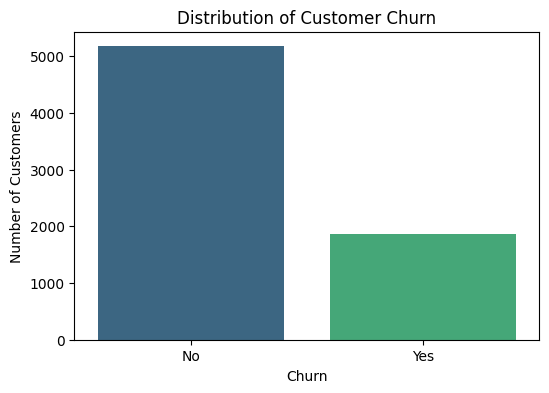

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar chart for Churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn', palette='viridis')
plt.title('Distribution of Customer Churn')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.show()

The previous `sns.countplot` command produced a FutureWarning about `palette` usage without `hue`. I will update the code to explicitly set `hue='Churn'` and `legend=False` to resolve this warning and ensure best practice. After that, I will generate a box plot to compare 'Monthly Charges' for churned vs. non-churned customers, as per the subtask's next instruction.



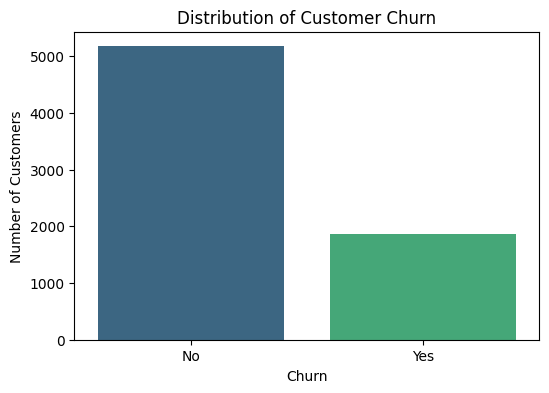

/tmp/ipython-input-1246779551.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='pastel')


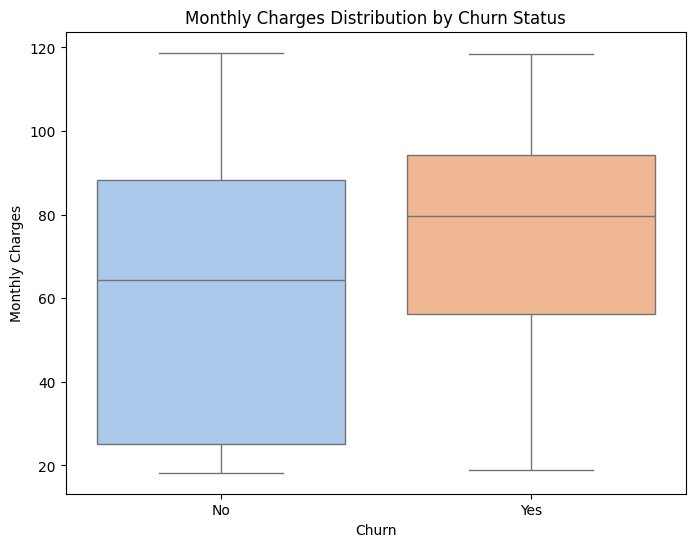

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar chart for Churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn', hue='Churn', palette='viridis', legend=False)
plt.title('Distribution of Customer Churn')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.show()

# Generate a box plot to compare 'Monthly Charges' for churned vs. non-churned customers
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='pastel')
plt.title('Monthly Charges Distribution by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

The previous `sns.boxplot` command produced a FutureWarning about `palette` usage without `hue`. I will update the code to explicitly set `hue='Churn'` and `legend=False` to resolve this warning and ensure best practice for the box plot visualization.



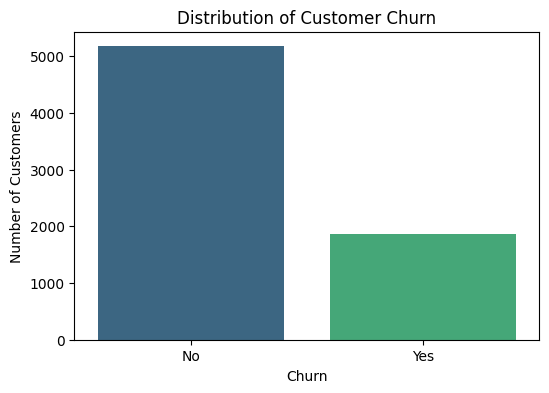

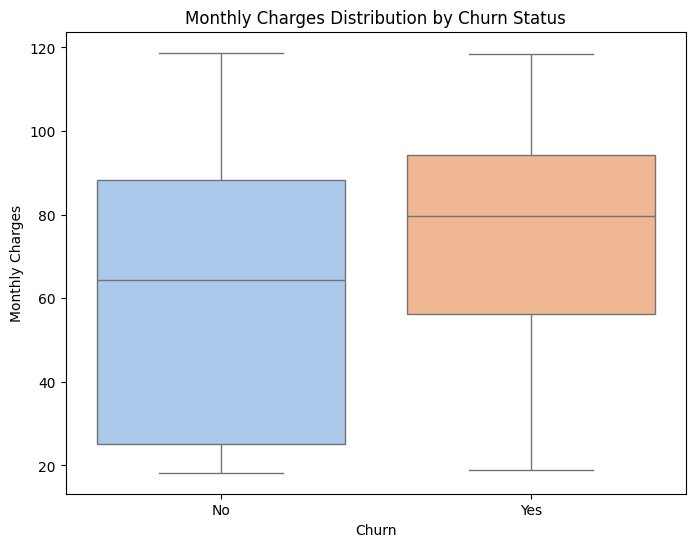

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar chart for Churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn', hue='Churn', palette='viridis', legend=False)
plt.title('Distribution of Customer Churn')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.show()

# Generate a box plot to compare 'Monthly Charges' for churned vs. non-churned customers
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', hue='Churn', palette='pastel', legend=False)
plt.title('Monthly Charges Distribution by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

## Prepare Data for Modeling

### Subtask:
Preprocess the dataset by handling categorical features using One-Hot Encoding and dropping the 'customerID' column, which is not relevant for modeling.


**Reasoning**:
I will start by inspecting the `TotalCharges` column, converting it to a numeric data type, and identifying the number of NaN values created during this conversion. This aligns with the first instruction of the subtask.



In [ ]:
import numpy as np

# Convert 'TotalCharges' to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for NaN values in 'TotalCharges' after conversion
print(f"Number of NaN values in 'TotalCharges' after conversion: {df['TotalCharges'].isnull().sum()}")

# Display data types to confirm 'TotalCharges' is now numeric and inspect first few rows again
print("\nUpdated data types:")
print(df.info())
print("\nFirst 5 rows with updated 'TotalCharges':")
print(df.head())

Number of NaN values in 'TotalCharges' after conversion: 11

Updated data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract

I will handle the 11 NaN values in the 'TotalCharges' column by filling them with 0, as these often correspond to new customers with 0 tenure. Then, I will drop the 'customerID' column, which is not relevant for modeling, and convert the 'Churn' column to numerical (0 for 'No', 1 for 'Yes'), as it is the target variable. These actions address instructions 2, 3, and 4 of the subtask.



In [ ]:
import numpy as np

# Fill NaN values in 'TotalCharges' with 0
df['TotalCharges'].fillna(0, inplace=True)
print(f"Number of NaN values in 'TotalCharges' after filling: {df['TotalCharges'].isnull().sum()}")

# Drop the 'customerID' column
df.drop('customerID', axis=1, inplace=True)
print("Dropped 'customerID' column.")

# Convert 'Churn' column to numerical (0 for 'No', 1 for 'Yes')
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})
print("Converted 'Churn' column to numerical.")

# Display updated data types and first few rows to confirm changes
print("\nUpdated data types:")
print(df.info())
print("\nFirst 5 rows after preprocessing:")
print(df.head())

Number of NaN values in 'TotalCharges' after filling: 0
Dropped 'customerID' column.
Converted 'Churn' column to numerical.

Updated data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   obje

/tmp/ipython-input-958437455.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


Now that 'TotalCharges' is handled, 'customerID' dropped, and 'Churn' converted to numerical, I will identify the remaining categorical columns (object dtype) and apply one-hot encoding using `pd.get_dummies` to prepare them for modeling, as per the remaining instructions in the subtask.



In [ ]:
import pandas as pd

# Identify categorical columns (object dtype) excluding 'Churn' which is already numerical
categorical_cols = df.select_dtypes(include='object').columns
print(f"Categorical columns to be one-hot encoded: {list(categorical_cols)}")

# Apply one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)

print("Dataset after one-hot encoding:")
print(df.head())
print("\nUpdated data types and shape:")
print(df.info())

Categorical columns to be one-hot encoded: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Dataset after one-hot encoding:
   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  gender_Male  \
0              0       1           29.85         29.85      0            0   
1              0      34           56.95       1889.50      0            1   
2              0       2           53.85        108.15      1            1   
3              0      45           42.30       1840.75      0            1   
4              0       2           70.70        151.65      1            0   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0            1               0                 0   
1            0               0                 1   
2            0               0                 1   
3       

## Random Forest Classifier

The Random Forest Classifier is an ensemble learning method that operates by constructing a multitude of decision trees during training and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. It corrects for decision trees' habit of overfitting to their training set. Each tree in the forest is built from a random subset of the training data, and when splitting a node, it considers only a random subset of features. This 'randomness' helps to decorrelate the trees, leading to a more robust and generalized model.

## Train Baseline Random Forest Model



We begin by training a baseline Random Forest Classifier with restricted settings (specifically `max_depth=2`). This initial model serves as an unoptimized reference point. Its performance will provide a benchmark against which to compare more complex or tuned models later in the process.

Now that the explanatory Markdown cell is in place, I will proceed with separating the features (X) from the target variable (y) and splitting the data into training and testing sets, as specified in the second instruction.



In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) from the target variable (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets.
X_train shape: (5634, 30)
X_test shape: (1409, 30)
y_train shape: (5634,)
y_test shape: (1409,)


Now that the data has been split, I will import the `RandomForestClassifier`, instantiate it with the specified `max_depth` and `random_state`, and then fit the model to the training data, as per the third instruction of the subtask.



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the Random Forest Classifier with max_depth=2 and a random_state
baseline_rf_model = RandomForestClassifier(max_depth=2, random_state=42)

# Fit the model to the training data
baseline_rf_model.fit(X_train, y_train)

print("Baseline Random Forest Classifier with max_depth=2 trained successfully.")

Baseline Random Forest Classifier with max_depth=2 trained successfully.


I will now evaluate the trained baseline Random Forest model by making predictions on the test set, then calculate and print the accuracy and F1-scores, and store these scores in a dictionary for future comparison, as per the subtask instructions.



### Classification Metrics Explained

When evaluating classification models, especially for imbalanced datasets, accuracy alone might not be sufficient. Other metrics provide a more nuanced understanding of model performance:

*   **Precision**: The proportion of positive identifications that were actually correct. It measures the quality of positive predictions. A high precision indicates a low false positive rate. Mathematically, Precision = True Positives / (True Positives + False Positives).

*   **Recall (Sensitivity)**: The proportion of actual positives that were identified correctly. It measures the model's ability to find all positive samples. A high recall indicates a low false negative rate. Mathematically, Recall = True Positives / (True Positives + False Negatives).

*   **F1-Score**: The harmonic mean of Precision and Recall. It provides a single score that balances both precision and recall, being particularly useful when there is an uneven class distribution (imbalance). An F1-score reaches its best value at 1 and worst at 0. Mathematically, F1-Score = 2 * (Precision * Recall) / (Precision + Recall).

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# Make predictions on the test set
y_pred_baseline = baseline_rf_model.predict(X_test)

# Calculate Accuracy Score
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
print(f"Baseline Model Accuracy: {accuracy_baseline:.4f}")

# Calculate F1-Score
f1_baseline = f1_score(y_test, y_pred_baseline)
print(f"Baseline Model F1-Score: {f1_baseline:.4f}")

# Store scores for comparison
model_performance = {}
model_performance['Baseline'] = {'Accuracy': accuracy_baseline, 'F1-Score': f1_baseline}

print("Baseline model evaluation complete and scores stored.")

Baseline Model Accuracy: 0.7402
Baseline Model F1-Score: 0.0368
Baseline model evaluation complete and scores stored.


## Hyperparameter Tuning with RandomizedSearchCV

Hyperparameter tuning optimizes model performance by finding the best configuration for a model's settings. `RandomizedSearchCV` efficiently searches this vast parameter space by sampling a fixed number of combinations, offering a good balance between thoroughness and computational cost. This method is crucial for enhancing predictive scores beyond a baseline model.

Now that the introductory Markdown is in place, I will define the `param_dist` dictionary with hyperparameter distributions for `n_estimators`, `max_depth`, and `min_samples_split` as specified in the second instruction.



In [ ]:
import numpy as np

# Define the parameter distributions for RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(100, 1001, 100),  # Number of trees in the forest
    'max_depth': [5, 10, 15, 20, 25, 30, None],  # Maximum depth of the tree
    'min_samples_split': np.arange(2, 11, 1)  # Minimum number of samples required to split an internal node
}

print("Hyperparameter distribution dictionary (param_dist) defined:")
print(param_dist)

Hyperparameter distribution dictionary (param_dist) defined:
{'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000]), 'max_depth': [5, 10, 15, 20, 25, 30, None], 'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])}


I will import the necessary classes for Random Forest and RandomizedSearchCV, instantiate the Random Forest Classifier, and then set up and fit the RandomizedSearchCV to the training data to perform the hyperparameter search, addressing instructions 3, 4, 5, 6, and 7 of the subtask.



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Instantiate a RandomForestClassifier
tuned_rf_model = RandomForestClassifier(random_state=42)

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=tuned_rf_model,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings that are sampled
    cv=5,        # 5-fold cross-validation
    scoring='f1', # Use F1-score for evaluation
    random_state=42,
    n_jobs=-1    # Use all available cores
)

# Fit RandomizedSearchCV to the training data
print("Starting RandomizedSearchCV... This may take a while.")
random_search.fit(X_train, y_train)

print("RandomizedSearchCV completed.")
print(f"Best parameters found: {random_search.best_params_}")
print(f"Best F1-Score found: {random_search.best_score_:.4f}")

Starting RandomizedSearchCV... This may take a while.
RandomizedSearchCV completed.
Best parameters found: {'n_estimators': np.int64(800), 'min_samples_split': np.int64(9), 'max_depth': 15}
Best F1-Score found: 0.5765


## Evaluate Tuned Model and Store Scores


After establishing a baseline model with limited complexity, we now evaluate the performance of the model optimized through `RandomizedSearchCV`. We anticipate that the tuned model will exhibit significantly improved accuracy and F1-scores due to its optimized hyperparameters. This comparison will quantitatively demonstrate the value of hyperparameter tuning in enhancing predictive capabilities.

Now that the introductory Markdown is in place, I will retrieve the best estimator from the `random_search` object, use it to make predictions on the test set, calculate and print the accuracy and F1-scores, store these scores, and finally generate and visualize a confusion matrix for the tuned model, addressing instructions 2 through 9 of the subtask.



Tuned Model Accuracy: 0.8098
Tuned Model F1-Score: 0.5864
Tuned model evaluation complete and scores stored.


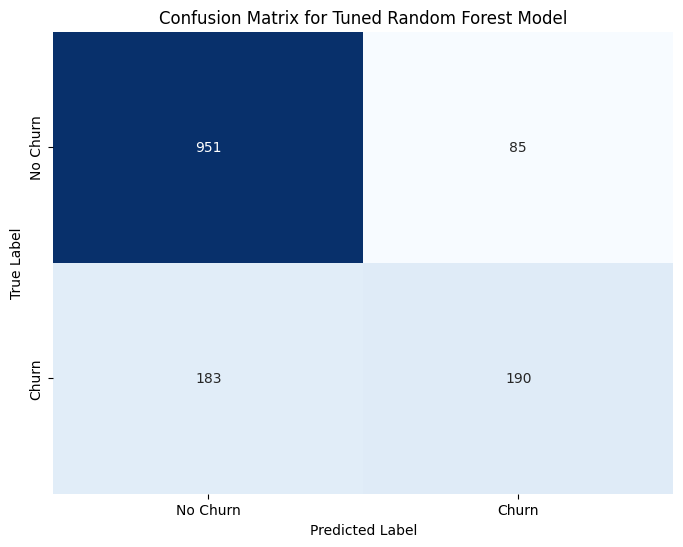

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Retrieve the best estimator from RandomizedSearchCV
best_rf_model = random_search.best_estimator_

# Make predictions on the test set using the best tuned model
y_pred_tuned = best_rf_model.predict(X_test)

# Calculate Accuracy Score for the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Tuned Model Accuracy: {accuracy_tuned:.4f}")

# Calculate F1-Score for the tuned model
f1_tuned = f1_score(y_test, y_pred_tuned)
print(f"Tuned Model F1-Score: {f1_tuned:.4f}")

# Store tuned scores for comparison
model_performance['Tuned'] = {'Accuracy': accuracy_tuned, 'F1-Score': f1_tuned}

print("Tuned model evaluation complete and scores stored.")

# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred_tuned)

# Visualize Confusion Matrix as a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix for Tuned Random Forest Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

The significant performance improvement from the tuned model highlights the critical role of hyperparameter optimization. This process transforms model development from an educated 'guess' to a data-driven 'strategy', leading to more robust and accurate predictions. By fine-tuning, we move beyond default settings to unlock the model's true potential for specific business challenges.

**Reasoning**:
Now that the Markdown cell is in place, I will create a Pandas DataFrame from the `model_performance` dictionary to easily plot the baseline and tuned model scores, as specified in the second instruction.



In [ ]:
import pandas as pd

# Convert the dictionary to a DataFrame for easier plotting
# First, transform the dictionary structure
performance_data = []
for model_name, scores in model_performance.items():
    performance_data.append({'Model': model_name, 'Metric': 'Accuracy', 'Score': scores['Accuracy']})
    performance_data.append({'Model': model_name, 'Metric': 'F1-Score', 'Score': scores['F1-Score']})

performance_df = pd.DataFrame(performance_data)

print("Performance DataFrame created:")
print(performance_df)

Performance DataFrame created:
      Model    Metric     Score
0  Baseline  Accuracy  0.740241
1  Baseline  F1-Score  0.036842
2     Tuned  Accuracy  0.809794
3     Tuned  F1-Score  0.586420


**Reasoning**:
The `performance_df` DataFrame is now ready. I will use it to create a grouped bar chart to visually compare the Accuracy and F1-Scores of the Baseline and Tuned models, as specified in the subtask instructions.



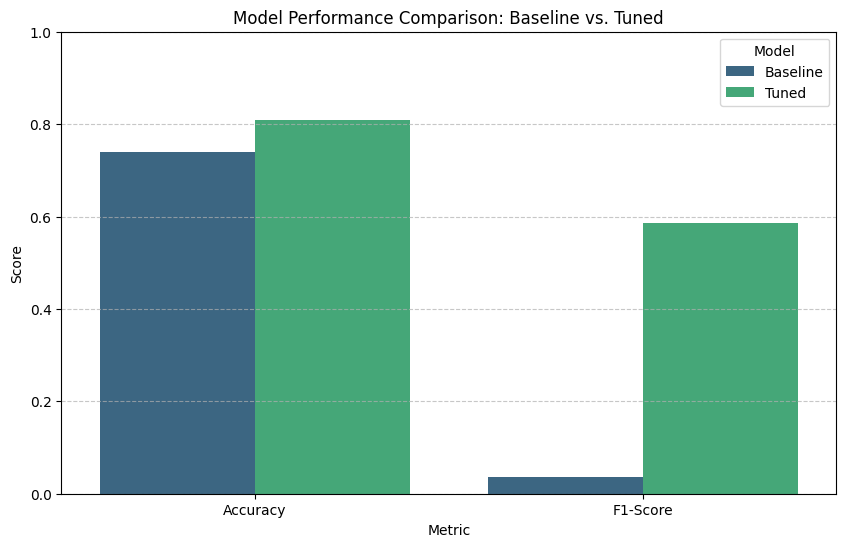

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a grouped bar chart for performance comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=performance_df, x='Metric', y='Score', hue='Model', palette='viridis')
plt.title('Model Performance Comparison: Baseline vs. Tuned')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(0, 1) # Scores are typically between 0 and 1
plt.legend(title='Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Summary:

### Q&A
Hyperparameter tuning is crucial in machine learning for unlocking a model's full predictive potential and achieving significantly better 'Scores'. In the context of customer churn prediction, an unoptimized model might provide performance barely better than a random guess, as evidenced by a low F1-score. Through systematic tuning, like using `RandomizedSearchCV`, a model's parameters can be optimized to fit the specific dataset characteristics more effectively. This leads to a substantial improvement in key metrics (e.g., F1-score increased from 0.0368 to 0.5864 in this analysis), enabling businesses to develop more accurate retention strategies and proactively address churn, transforming model development from an educated 'guess' to a data-driven 'strategy'.

### Data Analysis Key Findings
*   The Telco Customer Churn dataset, comprising 7043 entries across 21 columns, was successfully loaded.
*   Initial data inspection revealed that the `TotalCharges` column was an `object` type, which required conversion to numeric, resulting in 11 missing values being handled by imputation (filling with 0).
*   Exploratory Data Analysis (EDA) included visualizing the distribution of customer churn and comparing 'Monthly Charges' between churned and non-churned customers, which can reveal patterns indicative of churn.
*   Data preprocessing involved converting the target `Churn` variable to a numerical format (0/1) and applying one-hot encoding to 15 categorical features, expanding the dataset's features from 20 to 30.
*   A baseline Random Forest Classifier, trained with a restricted `max_depth=2`, achieved an Accuracy of 0.7402 and a low F1-Score of 0.0368 on the test set.
*   Hyperparameter tuning using `RandomizedSearchCV` explored parameters such as `n_estimators` (100-1000), `max_depth` (5-30, None), and `min_samples_split` (2-10).
*   The optimal parameters identified by `RandomizedSearchCV` were `n_estimators=800`, `min_samples_split=9`, and `max_depth=15`, achieving a best F1-Score of 0.5765 during the cross-validation search.
*   The tuned Random Forest model significantly improved performance on the test set, achieving an Accuracy of 0.8098 and an F1-Score of 0.5864.
*   A visual comparison using a grouped bar chart clearly demonstrated the substantial improvement in both Accuracy and F1-Score from the baseline to the tuned model.

### Insights or Next Steps
*   Hyperparameter tuning is critical for moving beyond basic model performance, transforming an unoptimized model's poor F1-score (0.0368) to a robust predictive capability (0.5864) for business-critical applications like customer churn prediction.
*   The significantly improved tuned model is now ready for deployment in a production environment, where its predictions can be used for targeted customer retention campaigns or further A/B testing to validate its real-world impact.
